## Handling missing data

Missing values in a dataset can occur due to several reasons such as breakdown of measuring equipment, accidental removal of observations, lack of response by respondents, error on the part of the reearcher, etc.

Let us read the dataset *GDP_missing_data.csv*, in which we have randomly removed some values, or put missing values in some of the columns. 

We'll also read *GDP_complete_data.csv*, in which we have not removed any values. We'll use this data later to assess the accuracy of our guess or estimate of missing values in *GDP_missing_data.csv*.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
gdp_missing_values_data = pd.read_csv('./Datasets/GDP_missing_data.csv')
gdp_complete_data = pd.read_csv('./Datasets/GDP_complete_data.csv')

In [7]:
gdp_missing_values_data.head()

,economicActivityFemale,country,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,geographic_location,contraception,continent
0,7.2,Afghanistan,45.0,154.0,2474.0,87.5,NaN,85.0,46.0,Southern Asia,NaN,Asia
1,7.8,Algeria,67.5,44.0,11433.0,76.4,26.1,51.0,70.3,Northern Africa,NaN,Africa
2,41.3,Argentina,69.6,22.0,NaN,76.2,3.8,3.8,76.8,South America,NaN,South America
3,52.0,Armenia,67.2,25.0,13638.0,65.0,NaN,0.5,74.0,Western Asia,NaN,Asia
4,53.8,Australia,NaN,6.0,54891.0,NaN,1.0,1.0,81.2,Oceania,NaN,Oceania


Observe that the `gdp_missing_values_data` dataset consists of some missing values shown as NaN (Not a Number).

### Identifying missing values ([`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html))
Missing values in a Pandas DataFrame can be identified with the [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) method. The Pandas Series object also consists of the [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isnull.html) method. For finding the number of missing values in each column of `gdp_missing_values_data`, we will sum up the missing values in each column of the dataset:

In [10]:
gdp_missing_values_data.isnull().sum()

economicActivityFemale    10
country                    0
lifeMale                  10
infantMortality           10
gdpPerCapita              10
economicActivityMale      10
illiteracyMale            10
illiteracyFemale          10
lifeFemale                10
geographic_location        0
contraception             71
continent                  0
dtype: int64

Note that the descriptive statistics methods associated with Pandas objects ignore missing values by defaulty. Consider the summary statistics of `gdp_missing_values_data`:

In [23]:
gdp_missing_values_data.describe()

,economicActivityFemale,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,contraception
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,84.000000
mean,45.935172,65.491724,37.158621,24193.482759,76.563448,13.570028,21.448897,70.615862,51.773810
std,16.875922,9.099256,34.465699,22748.764444,7.854730,16.497954,25.497045,9.923791,31.930026
min,1.900000,36.000000,3.000000,772.000000,51.200000,0.000000,0.000000,39.100000,0.000000
25%,35.500000,62.900000,10.000000,6837.000000,72.000000,1.000000,2.300000,67.500000,17.000000
50%,47.600000,67.800000,24.000000,15184.000000,77.300000,6.600000,9.720000,73.900000,65.000000
75%,55.900000,72.400000,54.000000,35957.000000,81.600000,19.500000,30.200000,78.100000,77.000000
max,90.600000,77.400000,169.000000,122740.000000,93.000000,70.500000,90.800000,82.900000,79.000000


Observe that the `count` statistics reports the number of non-missing values of each column in the data, as the number of rows in the data (see code below) are more than the number of non-missing values of all the variables in the above table. Similarly, for the rest of the statistics, such as `mean`, `std`, etc., the missing values are ignored.

In [26]:
#The dataset gdp_missing_values_data has 155 rows
gdp_missing_values_data.shape[0]

155

### Types of missing values


Now that we know how to identify missing values in the dataset, let us learn about the types of missing values that can be there. @rubin1976inference classified missing values in three categories.

#### Missing Completely at Random (MCAR)
If the probability of being missing is the same for all cases, then the data are said to be missing completely at random. An example of MCAR is a weighing scale that ran out of batteries. Some of the data will be missing simply because of bad luck.

#### Missing at Random (MAR)
If the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random (MAR). MAR is a much broader class than MCAR. For example, when placed on a soft surface, a weighing scale may produce more missing values than when placed on a hard surface. Such data are thus not MCAR. If, however, we know surface type and if we can assume MCAR within the type of surface, then the data are MAR

#### Missing Not at Random (MNAR)
MNAR means that the probability of being missing varies for reasons that are unknown to us. For example, the weighing scale mechanism may wear out over time, producing more missing data as time progresses, but we may fail to note this. If the heavier objects are measured later in time, then we obtain a distribution of the measurements that will be distorted. MNAR includes the possibility that the scale produces more missing values for the heavier objects (as above), a situation that might be difficult to recognize and handle.

*Source: https://stefvanbuuren.name/fimd/sec-MCAR.html*

$\color{red}{\text{Q1}}$: In which of the above scenarios can we ignore the observations corresponding to missing values without the risk of skewing the analysis/trends in the data?

$\color{red}{\text{Q2}}$: In which of the above scenario will it be the most risky to impute or estimate missing values?

### Dropping observations with missing values ([`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html))
Sometimes our analysis requires that there should be no missing values in the dataset. For example, while building statistical models, we may require the values of all the predictor variables. The quickest way is to use the `dropna()` method, which drops the observations that even have a single missing value, and leaves only complete observations in the data.

Let us drop the rows containing even a single value from `gdp_missing_values_data`.

In [30]:
gdp_no_missing_data = gdp_missing_values_data.dropna()

In [31]:
#Shape of gdp_no_missing_data
gdp_no_missing_data.shape

(42, 12)

Dropping rows with even a single missing value has reduced the number of rows from 155 to 42! However, earlier we saw that all the columns except `contraception` had at most 10 missing values. Removing all rows / columns with even a single missing value results in loss of data that is non-missing in the respective rows/columns. Thus, it is typically a bad idea to drop observations with even a single missing value, except in cases where we have a very small number of missing-value observations.

If a few values of a column are missing, we can possibly estimate them using the rest of the data, so that we can (hopefully) maximize the information that can be extracted from the data. However, if most of the values of a column are missing, it may be harder to estimate its values.

In this case, we see that around 50% values of the `contraception` column is missing. Thus, we'll drop the column as it may be hard to impute its values based on a relatively small number of non-missing values.

In [36]:
#Deleting column with missing values in almost half of the observations
gdp_missing_values_data.drop(['contraception'],axis=1,inplace=True)
gdp_missing_values_data.shape

(155, 11)

### Some methods to impute missing values
There are an unlimited number of ways to impute missing values. Some imputation methods are provided in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

The best way to impute them will depend on the problem, and the assumptions taken. Below are just a few examples.



#### Method 1: Naive Method
Filling the missing value of a column by copying the value of the previous non-missing observation.

In [37]:
#Filling missing values: Method 1- Naive way
gdp_imputed_data = gdp_missing_values_data.fillna(method = 'ffill')

In [42]:
#Checking if any missing values are remaining
gdp_imputed_data.isnull().sum()

economicActivityFemale    0
country                   0
lifeMale                  0
infantMortality           0
gdpPerCapita              0
economicActivityMale      0
illiteracyMale            1
illiteracyFemale          0
lifeFemale                0
geographic_location       0
continent                 0
dtype: int64

After imputing missing values, note there is still one missing value for *illiteracyMale*. Can you guess why one missing value remained?

Let us check how good is this method in imputing missing values. We'll compare the imputed values of `gdpPerCapita` with the actual values. Recall that we had randomly put some missing values in `gdp_missing_values_data`, and we have the actual values in `gdp_complete_data`.

In [44]:
#Index of rows with missing values for GDP per capita
null_ind_gdpPC = gdp_missing_values_data.index[gdp_missing_values_data.gdpPerCapita.isnull()]

In [91]:
#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted():
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = gdp_complete_data.loc[null_ind_gdpPC,'gdpPerCapita']
    y = gdp_imputed_data.loc[null_ind_gdpPC,'gdpPerCapita']
    plt.scatter(x,y)
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual GDP per capita',fontsize=20)
    plt.ylabel('Imputed GDP per capita',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    rmse = np.sqrt(((x-y).pow(2)).mean())
    print("RMSE=",rmse)

RMSE= 34843.91091137732


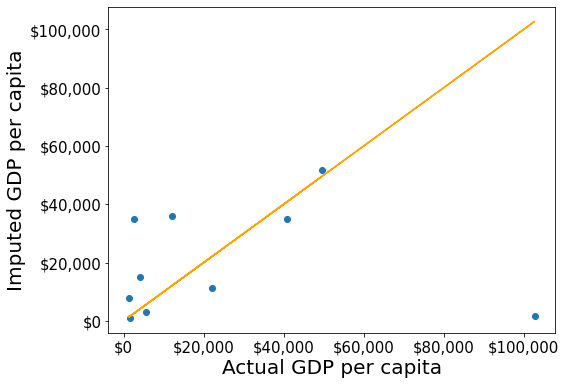

In [92]:
#Plot comparing imputed values with actual values, and computing the Root mean square error (RMSE) of the imputed values
plot_actual_vs_predicted()